<a href="https://colab.research.google.com/github/kRuvpin/KCBV_Mamang/blob/main/UAS_KCBV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Networks and Computer Vision with TensorFlow

## Get data

In [ ]:
import zipfile
# Download zip file of pizza_steak images
!wget https://raw.githubusercontent.com/kRuvpin/KCBV_Mamang/main/gempa.zip 

# Unzip the downloaded file
!unzip /content/gempa.zip

--2022-06-29 02:57:38--  https://raw.githubusercontent.com/kRuvpin/KCBV_Mamang/main/gempa.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168656 (165K) [application/zip]
Saving to: ‘gempa.zip’

gempa.zip           100%[===================>] 164.70K  --.-KB/s    in 0.003s  

2022-06-29 02:57:38 (59.0 MB/s) - ‘gempa.zip’ saved [168656/168656]

Archive:  /content/gempa.zip
   creating: gempa/test/
   creating: gempa/test/gempa_lain/
  inflating: gempa/test/gempa_lain/dll1.jpg  
  inflating: gempa/test/gempa_lain/dll3.jpg  
  inflating: gempa/test/gempa_lain/dll4.jpg  
   creating: gempa/test/volcanic/
  inflating: gempa/test/volcanic/gempa4.jpg  
  inflating: gempa/test/volcanic/vol1.jpg  
  inflating: gempa/test/volcanic/vol2.jpg  
   creating: gempa/train

## File Structure

Example of file structure

pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    

In [ ]:
!ls gempa

'gempa lain'   test   training	 volcanic


In [ ]:
!ls gempa/training/

gempa_lain  volcanic


In [ ]:
!ls gempa/training/volcanic

gempa5.jpg  gempa6.jpg	vol3.jpg


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("gempa"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 4 directories and 0 images in 'gempa'.
There are 2 directories and 0 images in 'gempa/gempa lain'.
There are 0 directories and 3 images in 'gempa/gempa lain/train'.
There are 0 directories and 3 images in 'gempa/gempa lain/test'.
There are 2 directories and 0 images in 'gempa/training'.
There are 0 directories and 3 images in 'gempa/training/gempa_lain'.
There are 0 directories and 3 images in 'gempa/training/volcanic'.
There are 2 directories and 0 images in 'gempa/test'.
There are 0 directories and 3 images in 'gempa/test/gempa_lain'.
There are 0 directories and 3 images in 'gempa/test/volcanic'.
There are 2 directories and 0 images in 'gempa/volcanic'.
There are 0 directories and 3 images in 'gempa/volcanic/train'.
There are 0 directories and 3 images in 'gempa/volcanic/test'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("gempa/training/volcanic"))

num_steak_images_train

3

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("gempa/training/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['gempa_lain' 'volcanic']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (306, 612)


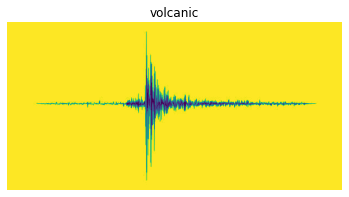

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="gempa/training/",
                        target_class="volcanic")

In [ ]:
# View the img (actually just a big array/tensor)
img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(306, 612)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "gempa/training/"
test_dir = "gempa/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.6886 - accuracy: 0.6667 - val_loss: 0.7710 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 511ms/step - loss: 0.7106 - accuracy: 0.5000 - val_loss: 0.6718 - val_accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 493ms/step - loss: 0.6056 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 487ms/step - loss: 0.6060 - accuracy: 0.6667 - val_loss: 0.6695 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 504ms/step - loss: 0.5596 - accuracy: 0.8333 - val_loss: 0.6410 - val_accuracy: 0.6667


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
1/1 [==============================] - 1s 657ms/step - loss: 0.6869 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 91ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 100ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 92ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 92ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
1/1 [==============================] - 1s 779ms/step - loss: 0.7657 - accuracy: 0.5000 - val_loss: 12.2577 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 147ms/step - loss: 14.0097 - accuracy: 0.5000 - val_loss: 12.6751 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 160ms/step - loss: 14.1262 - accuracy: 0.5000 - val_loss: 15.1039 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 166ms/step - loss: 16.9436 - accuracy: 0.5000 - val_loss: 3.1558 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 150ms/step - loss: 2.6645 - accuracy: 0.5000 - val_loss: 22.7842 - val_accuracy: 0.5000


In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data


Image shape: (306, 612)
Image shape: (277, 1012, 3)


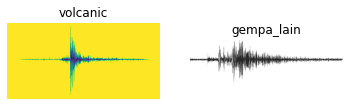

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("gempa/training/", "volcanic")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("gempa/training/", "gempa_lain")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define training and test directory paths
train_dir = "gempa/training/"
test_dir = "gempa/test/"

In [ ]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 6 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(6, 6)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 0., 0.], dtype=float32)

### 3. Create a model (start with a baseline)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### 4. Fit a model


In [ ]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(1, 1)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.7331 - accuracy: 0.5000 - val_loss: 27.4282 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 577ms/step - loss: 31.0739 - accuracy: 0.5000 - val_loss: 10.6400 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 548ms/step - loss: 11.4506 - accuracy: 0.5000 - val_loss: 7.3204 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 546ms/step - loss: 7.6305 - accuracy: 0.5000 - val_loss: 11.1539 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 544ms/step - loss: 11.7228 - accuracy: 0.5000 - val_loss: 8.7741 - val_accuracy: 0.5000


5. Evaluate the model

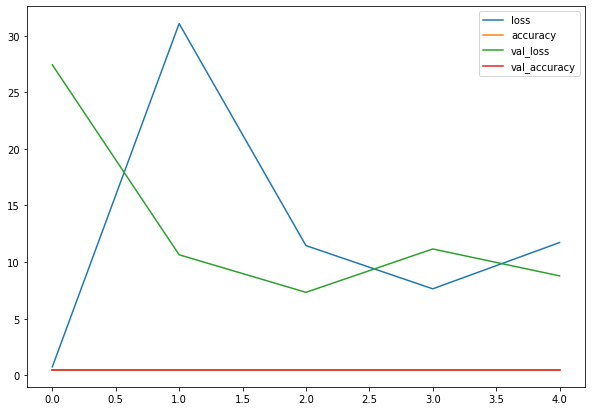

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

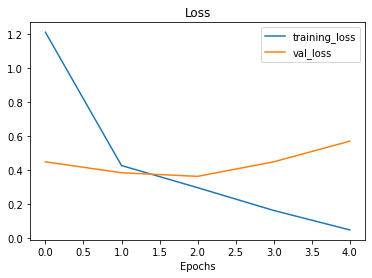

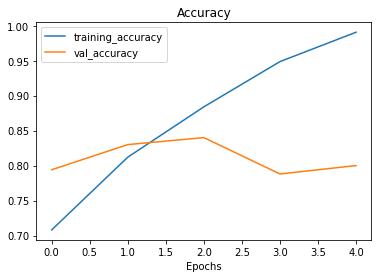

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters


```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.7198 - accuracy: 0.5000 - val_loss: 0.7580 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 341ms/step - loss: 0.7495 - accuracy: 0.5000 - val_loss: 0.7131 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 271ms/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 287ms/step - loss: 0.6581 - accuracy: 0.6667 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 268ms/step - loss: 0.6467 - accuracy: 0.8333 - val_loss: 0.6887 - val_accuracy: 0.5000


In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

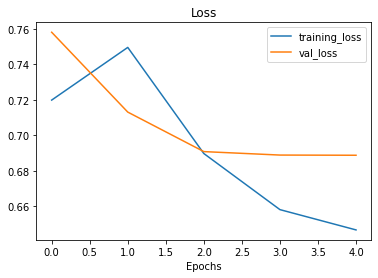

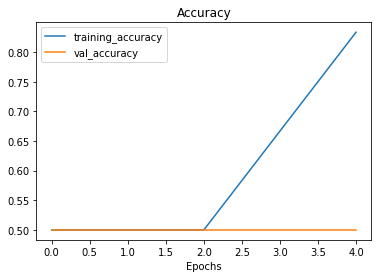

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 6 images belonging to 2 classes.
Non-augmented training images:
Found 6 images belonging to 2 classes.
Unchanged test images:
Found 6 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

IndexError: ignored

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 1s 987ms/step - loss: 0.6926 - accuracy: 0.5000 - val_loss: 0.6975 - val_accuracy: 0.3333
Epoch 2/5
1/1 [==============================] - 0s 343ms/step - loss: 0.6888 - accuracy: 0.5000 - val_loss: 0.6974 - val_accuracy: 0.3333
Epoch 3/5
1/1 [==============================] - 0s 340ms/step - loss: 0.7007 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 342ms/step - loss: 0.6718 - accuracy: 0.6667 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 334ms/step - loss: 0.6696 - accuracy: 0.6667 - val_loss: 0.6956 - val_accuracy: 0.6667


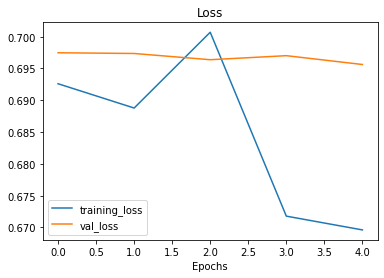

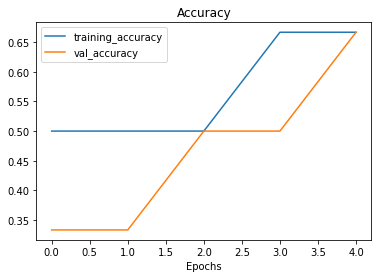

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 6 images belonging to 2 classes.


In [ ]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 1s 971ms/step - loss: 0.6999 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.6667
Epoch 2/5
1/1 [==============================] - 0s 337ms/step - loss: 0.6787 - accuracy: 0.6667 - val_loss: 0.6863 - val_accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 334ms/step - loss: 0.6662 - accuracy: 0.8333 - val_loss: 0.6768 - val_accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 346ms/step - loss: 0.6559 - accuracy: 0.6667 - val_loss: 0.6693 - val_accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 0s 332ms/step - loss: 0.6446 - accuracy: 0.8333 - val_loss: 0.6558 - val_accuracy: 0.6667


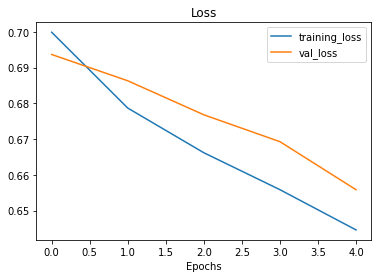

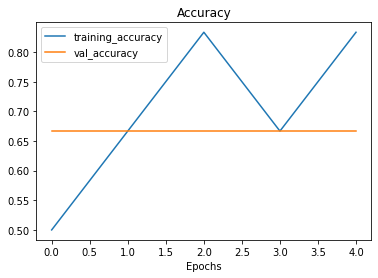

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

### 7. Repeat until satisified

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.6908 - accuracy: 0.5000 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 1s 549ms/step - loss: 0.6876 - accuracy: 0.5000 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 1s 555ms/step - loss: 0.6853 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 1s 551ms/step - loss: 0.6716 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 1s 547ms/step - loss: 0.6532 - accuracy: 1.0000 - val_loss: 0.7138 - val_accuracy: 0.5000


In [ ]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

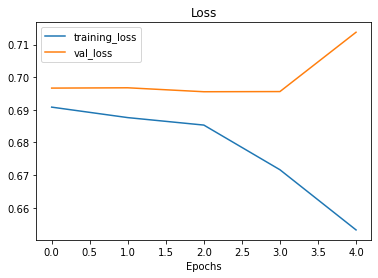

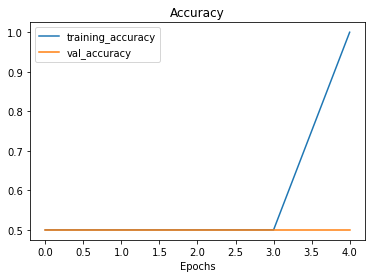

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

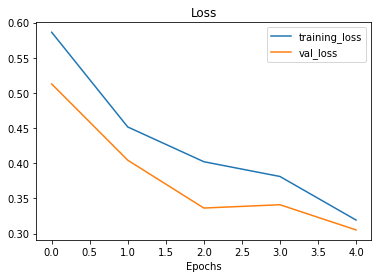

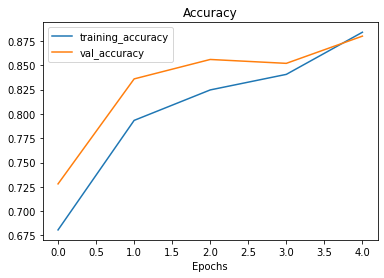

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

### Making a prediction with our trained model

In [ ]:
# Classes we're working with
print(class_names)

['gempa_lain' 'volcanic']


--2022-06-29 03:17:19--  https://raw.githubusercontent.com/kRuvpin/KCBV_Mamang/main/sesaceh.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11673 (11K) [image/jpeg]
Saving to: ‘sesaceh.jpg.1’

sesaceh.jpg.1       100%[===================>]  11.40K  --.-KB/s    in 0.002s  

2022-06-29 03:17:19 (7.30 MB/s) - ‘sesaceh.jpg.1’ saved [11673/11673]



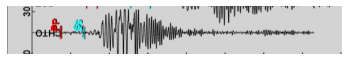

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/kRuvpin/KCBV_Mamang/main/sesaceh.jpg
gempa = mpimg.imread("sesaceh.jpg")
plt.imshow(gempa)
plt.axis(False);

In [ ]:
# Check the shape of our image
gempa.shape

(76, 535, 3)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
gempa = load_and_prep_image("sesaceh.jpg")
gempa

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7027311 , 0.7027311 , 0.7027311 ],
        [0.81993175, 0.81993175, 0.81993175],
        [0.8269958 , 0.8269958 , 0.8269958 ],
        ...,
        [0.8235294 , 0.8235294 , 0.8235294 ],
        [0.8235294 , 0.8235294 , 0.8235294 ],
        [0.8235294 , 0.8235294 , 0.8235294 ]],

       [[0.7027311 , 0.7027311 , 0.7027311 ],
        [0.81993175, 0.81993175, 0.81993175],
        [0.8269958 , 0.8269958 , 0.8269958 ],
        ...,
        [0.8235294 , 0.8235294 , 0.8235294 ],
        [0.8235294 , 0.8235294 , 0.8235294 ],
        [0.8235294 , 0.8235294 , 0.8235294 ]],

       [[0.7027311 , 0.7027311 , 0.7027311 ],
        [0.81993175, 0.81993175, 0.81993175],
        [0.8269958 , 0.8269958 , 0.8269958 ],
        ...,
        [0.8235294 , 0.8235294 , 0.8235294 ],
        [0.8235294 , 0.8235294 , 0.8235294 ],
        [0.8235294 , 0.8235294 , 0.8235294 ]],

       ...,

       [[0.7027311 , 0.7027311 , 0.7027311 ],
        [0.81

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {gempa.shape}")
gempa = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {gempa.shape}")
gempa

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 76, 535, 3)


<tf.Tensor: shape=(1, 76, 535, 3), dtype=uint8, numpy=
array([[[[106, 106, 106],
         [210, 210, 210],
         [211, 211, 211],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[106, 106, 106],
         [210, 210, 210],
         [211, 211, 211],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[106, 106, 106],
         [210, 210, 210],
         [211, 211, 211],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        ...,

        [[106, 106, 106],
         [210, 210, 210],
         [211, 211, 211],
         ...,
         [188, 188, 188],
         [135, 135, 135],
         [216, 216, 216]],

        [[106, 106, 106],
         [210, 210, 210],
         [211, 211, 211],
         ...,
         [145, 145, 145],
         [ 19,  19,  19],
         [202, 202, 202]],

        [[106, 106, 106],
         [210, 210, 210],
         [211, 211,

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(gempa)
pred

ValueError: ignored

In [ ]:
# Remind ourselves of our class names
class_names

array(['gempa_lain', 'volcanic'], dtype='<U10')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

NameError: ignored

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

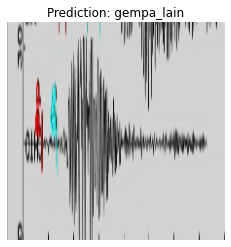

In [ ]:
# Test our model on a custom image
pred_and_plot(model_8, "sesaceh.jpg", class_names)

--2022-06-23 17:11:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-06-23 17:11:54 (158 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



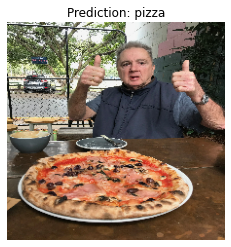

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)